EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - Fabian Estay
  - Tomás Ponce
- Usuario de GitHub (opcional):  TomasPonce712, estayfabian02


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [1]:
# Importamos las librerías que utilizaremos

from sklearn import datasets, linear_model  # https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #Particiona en datos de entrenamiento y prueba

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Librería que filtra warnings innecesarios
import warnings

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [2]:
url='https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv'
df=pd.read_csv(url)

### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [3]:
df.head()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.tail()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [6]:
df.dtypes

date                                   object
source                                 object
Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                           

Head() sirve para mostrar las primeras filas de un Dataframe. Por defecto muestra las primeras 5 filas pero se puede especificar el numero especifico de filas requeridas como argumento. Sirve para hechar un vistazo rapido a los datos, y hacerse una idea de las variables, o revisar especificamente las primeras observaciones.
<br>Tail() sirve para mostrar las ultimas filas de un Dataframe. Similar a head(), muestra las últimas 5 filas por defecto, aunque se puede especificar cuantas filas del final del dataframe mostrar como argumento, según se requiera. Tambien es útil para hechar un vistazo rapido a los datos, o si se necesita observar las últimas observaciones en particular.
<br>Info() sirve para obtener un resumen general de las un dataframe. Muestra los nombres de las variables, y de estas se muestran la cantidad de valores no nulos, y el tipo de variable al que corresponde. Además, se observa la memoria utilizada. Sirve para tener una visión general (sin muchas especifidades) de las variables del dataframe.
<br>df.dtypes sirve para obtener los tipos de datos de cada columna o variable en un dataframe. Esto es útil para tener conocimiento de las variables antes de manipularlas, tratarlas o analizarlas.

### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [7]:
df.drop(columns=['source'], inplace=True)

### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [8]:
df['date']=pd.to_datetime(df['date'])

### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.

*Para esta respuesta, asumimos que GDP (% per capita) se refiere al crecimiento en terminos porcentuales de la variable PIB per capita respecto a un periodo anterior

Population
---
La relación teorica entre el crecimiento del PIB per capita y la población es ambigua, pues una población más numerosa, por un lado, disminuye el PIB per cápita al distribuir la riqueza entre más personas. Sin embargo, por otro lado, una población numerosa tiene un efecto positivo en el PIB per capita y en su crecimiento, pues hay un aumento de la fuerza laboral y por tanto fuerza de productividad, y tambien hay un aprovechamiento de las economías de escala.
Por las razones anteriores, la cuantía de la población y el crecimiento del PIB per capita tienen una relación teorica ambigua.

Area (sq. mi.)
---
Un país con mayor área geográfica tiene el potencial de acceder a más recursos naturales, tierras cultivables o espacio para desarrollo económico. Es por esto que la relación teorica es positiva, pero en ultima instancia puede verse debilitada por otros factores influyentes, como la eficiencia o la forma en que se aprovechen estos recursos.

Pop. Density (per sq. mi.)
---
Una mayor densidad poblacional puede favorecer el crecimiento del PIB per capita por una mayor eficiencia en la provisión de servicios públicos y fuerza laboral. Sin ambargo, esta relación se debilita, e incluso puede llegar a anularse o a volverse negativa por otros factores influyentes, como la distribución de la fuerza laboral, la eficiencia en la distribución de bienes y servicios, y la calidad de la infraestructura. Es por estas razones que en última instancia, la relación es amigua.

Coastline (coast/area ratio)
---
Países con mayor acceso al mar en terminos de superficie tienen un mayor acceso al comercio marítimo, lo que facilita la exportación e importación de bienes, y además se favorecen sectores como la pesca, el turismo costero y el transporte maritimo. Estos factores estimulan el crecimiento económico, y se relacionan con un mayor PIB per cápita.



Net migration
---
La migración neta es el resultado de la diferencia entre la inmigración y la emigración de las fronteras del país en determinado periodo de tiempo. En promedio, países con mayor PIB per cápita suelen tener mejores condiciones de vida, por lo tanto, reciben una mayor cantidad de inmigrantes buscando mejores oportunidades, y hay menos personas emigrando hacia otros países, al no tener necesidad de buscar mejor vida en otro lado.
Por lo tanto, un país con mayor PIB per capita tendería a tener inmigración neta positiva.

Infant mortality (per 1000 births)
---
En promedio, los países con mayor PIB per capita tienen mayor acceso a servicios de la salud, a vivienda, a alimentación y a acceso a agua. Es por este mayor acceso a bienes y servicios fundamentales para la supervivencia de un niño o niña que los países con un mayor PIB per capita tenderían a tener una menor mortalidad infantil.

GDP (per capita)
---
PIB per cápita en dólares ($) representa el ingreso promedio de la población, mientras que PIB per cápita en porcentaje (%) usualmente se refiere al crecimiento porcentual del PIB per cápita respecto al año anterior.
Teniendo estas definiciones en mente, podemos decir que un país podría tener un PIB per cápita alto, pero un bajo crecimiento. Sin embargo, un país que tenga un crecimiento mayor tendería a tener un PIB per capita mayor.
En suma, la relación entre PIB per capita y en terminos de crecimiento es ambigua, aunque en promedio y teoricamente, tendería a ser positiva.

Literacy (%)
---
Una mayor tasa de alfabetización está relacionada con un mayor acceso a la educación, y a una población más culta, educada, y capaz de resolver problemas y desenvolverse en el mercado, lo que se traduce en un aumento en el capital humano.
Es por esto que una mayor tasa de alfabetización se relaciona con un mayor crecimiento del PIB per capita.
Además, un PIB per capita mayor se asocia a que las familias tienen mayores oportunidades para brindarle a sus hijos un mejor acceso a educación, y por tanto, mayor alfabetización de la población.


Phones (per 1000)
---
Phones representaría una medida del acceso a telefonos en la población, en promedio. Al haber un mayor acceso a telefonos, hay una facilidad de comunicación, acceso a la información, y eficacia al desenvolverse en el mercado. Es por esta razón que un mayor acceso a telefonos estaría relacionado a un mayor crecimiento del PIB per capita.
Además, el crecimiento del PIB per capita está relacionado con un mayor acceso a bienes por parte de la población, por lo que hay tambien un mayor acceso a telefonos.

Arable (%)
---
Arable es una variable que representa el porcentaje del territorio que es apto para cultivo.
Por un lado, una mayor proporción de tierra arable puede facilitar el desarrollo de la agricultura, lo cual puede ser una fuente de crecimiento para el país, aumentando el crecimiento del PIB per cápita, especialmente en economías en desarrollo.
Sin embargo, en economías más desarrolladas, esta variable puede generar un efecto más debil o nulo, pues estas economías son menos intensivas en el sector de la agricultura, dependiendo más de sectores industriales o de servicios.
En suma, la relación entre el crecimiento del PIB per cápita y la proporción de tierra arable es incierta, dependiendo del nivel de desarrollo de la economía, y de la forma en que se manejen inversiones y recursos.

Crops (%)
---
Crops es el porcentaje del territorio destinado al cultivo de cultivos permanentes o temporales.
Similar a la variable Arable, la relación de esta variable con el crecimiento del PIB per cápita depende del nivel de desarrollo económico de un país, pues economías en desarrollo altamente intensivas en el sector agrícola mostrarán una relación positiva entre el crecimiento y el porcentaje del territorio destinado al cultivo. Sin embargo, en países más desarrollados, y más dependientes en sectores industriales, esta dependencia puede ser mucho más baja o nula.
Por otro lado, un mayor indice en la variable Crops puede sugerir una economía poco diversificada.
En suma, la relación entre la variable Crops y GDP (% Per Capita) es incierta, y dependerá del nivel de desarrollo económico, de la productividad, de la capacidad de diversificación, y de las inversiones en capitales fijos, ya sean externos o internos.

Climate
---
Esta variable solo toma valores de números enteros, por lo que parece ser una variable de tipo categórica que representa distintos tipos de climas. Ejemplos de climas que podrían estar incluidos en esta variable categógrica son clima templado, clima seco, clima tropical, clima polar, etc.
La relación entre esta variable de clima y el crecimiento del PIB per capita es incierto, dado que esta relación dependerá de que tanto depende la economía de ciertas actividades o sectores en particular, como agricultura, minería, industria, etc.

Birthrate
---
La relación entre el crecimiento del PIB per cápita y la tasa de natalidad es teoricamente negativa, puesto que países con mayor crecimiento del PIB per cápita y mayor nivel de desarrollo económico tienen menores tasas de natalidad, esto por mayor acceso a métodos anticonceptivos, y una preferencia en las familias por tener menos hijos, y dar a estos una mayor educación (distribuir más recursos en menos hijos).
<Br>Por otro lado, países con menor crecimiento y nivel de desarrollo suelen tener más hijos, para que estos contribuyan en el ingreso familiar, invirtiendo poco capital en forma de educación para cada hijo.

Deathrate
---
La tasa de mortalidad tiene una relación negativa con el nivel de PIB per cápita. Un mayor nivel de crecimiento y de desarrollo económico en una economía facilita a las personas en esta el acceso a servicios de la salud, a nutrición, y a mejores condiciones sanitarias.
<Br>Cabe destacar que en la actualidad, se observa una tendencia social en forma de piramide invertida de grupos etarios; mucha gente vieja y pocos niños y jovenes.

Agriculture
---
Agriculture es el peso del sector agricola (% del PIB) en la economía.
Países con mayor nivel de crecimiento y desarrollo económico suelen depender menos del sector agrícola, teniendo este un menor peso en la economía, y abriendo lugar a sectores industriales y de servicios.
<Br>Por la razón anterior, la relación teorica entre el nivel de PIB per capita y la variable Agriculture sería negativa.

Industry
---
Conforme una economía tiene un mayor crecimiento económico, tiene un mayor desarrollo del sector industrial (manufactura, construcción, minería), el cual suele estar asociado a un aumento de la productividad, creación de empleos formales, y exportaciones con mayor valor agregado.
<Br>Es por la razón anterior que la relación teorica entre el nivel del PIB per capita es positiva.

Service
---
Conforme una economía se va desarrollando, en promedio goza de un mayor crecimiento de PIB per cápita, y, posterior al desarrollo de la industria, la economía desarrolla el sector servicios (educación, salud, tecnología, finanzas, turismo, etc). Este sector genera alto valor agregado, demanda capital humano calificado, y es motor clave del crecimiento en economías modernas.
Además, cuando el PIB per cápita aumenta, crece la demanda por servicios más sofisticados y personalizados. 
<Br>Es por estas razones que un mayor desarrollo del sector servicios se relaciona positivamente con el nivel de PIB per cápita.

### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [9]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\1221590617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GDP ($ per capita)'])


<Axes: xlabel='GDP ($ per capita)', ylabel='Density'>

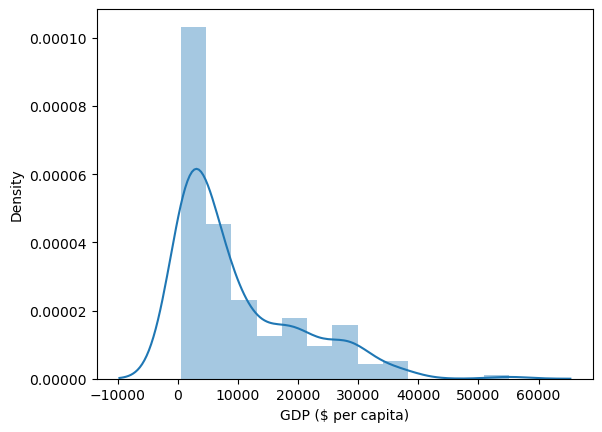

In [10]:
sns.distplot(df['GDP ($ per capita)'])

<Axes: xlabel='Literacy (%)', ylabel='Count'>

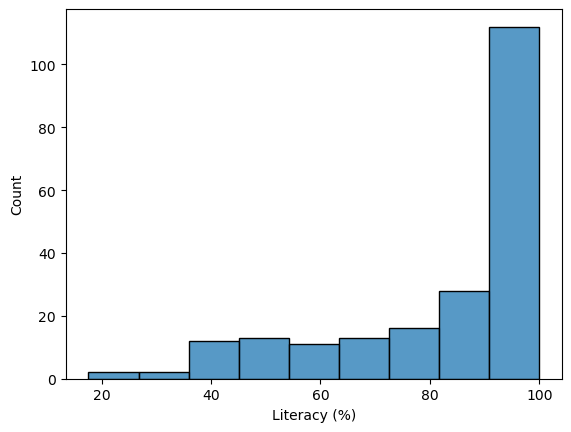

In [11]:
sns.histplot(df['Literacy (%)'])

<Axes: xlabel='Industry', ylabel='Count'>

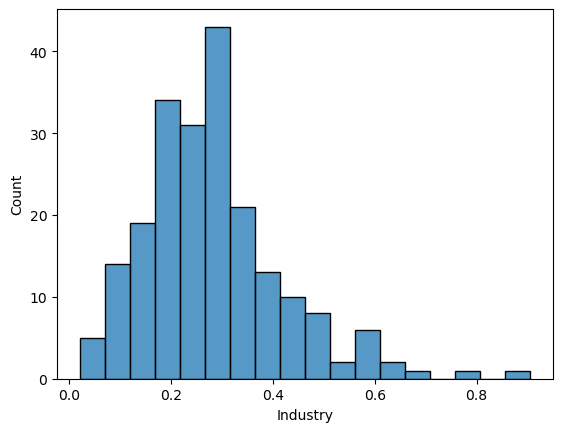

In [12]:
sns.histplot(df['Industry'])




---


Analizar las distribuciones de las variables a utilizar en el modelo es importante, pues al realizar modelos predictivos o análisis estadísticos, es necesario comprender a cabalidad el comportamiento y la naturaleza variables involucradas en el modelo.
<br>Al analizar las distribuciones de las variables, podemos identificar las observaciones Outliers, y tomar medidas de forma que los casos atípicos no influyan en el modelo, y nos lleven a tomar conclusiones sesgadas.
<br>Además, al analizar la distribución de las variables, podemos observar si una variable tiene un tipo de distribución sesgada, lo cual podría generar problemas con modelos que asumen normalidad, tales como regresiones lineales.
<br>Un ejemplo de análisis de distribución de variable sería el de la variable GDP ($ per capita). Podemos esperar de la distribución de esta variable que esté más cargada hacia valores medianos o medianamente pequeños, pues una alta proporción de países tienen un GDP per capita bajo o muy bajo, y una proporción baja de países tienen muy altos valores de GDP per capita (países desarrollados).
<br>Al realizar el gráfico de densidad de GDP per capita, podemos ver que en los datos se cumple la distribución esperada de GDP per capita, por lo que no tenemos riesgo de outliers en esta variable en particular.
<br>En cuanto a la distribución, vemos que el gráfico tiene una forma que se asemeja a una distribución log-normal, por lo que si queremos realizar predicciones utilizando esta variable, puede ser conveniente aplicar una transformación a la variable aplicando un logaritmo, de forma que el modelo no sea tan sensible a valores extremos.


---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [13]:
df[df.isnull().any(axis=1)]

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,2007-01-01,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,...,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
25,2007-01-01,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,...,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
36,2007-01-01,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,...,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
47,2007-01-01,Cook Islands,OCEANIA,21388,240,89.1,50.00,NaN,NaN,5000.0,...,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
50,2007-01-01,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,...,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
52,2007-01-01,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,...,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,2007-01-01,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,...,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
66,2007-01-01,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,...,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


In [14]:
df.isna().sum()

date                                   0
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Podemos observar que el dataframe efectivamente tiene missing values. A continuación, imputaremos los valores faltantes según los metodos que consideremos convenientes.

Imputaremos las observaciones que tengan valores faltantes en Agriculture, Industry, y Service, pues no queremos que los datos faltantes ensucien las medidas estadísticas, y nos arriesguen a llegar a conclusiones incorrectas o sesgadas.

Considerando que las regiones con porciones de territorio que comparten caracteristicas étnicas, climáticas, topográficas, administrativas, entre otras, utilizaremos la moda o la media de la región en ciertas variables para reemplazar los valores missing. 
<br>Respecto a los missing values en la variable "Climate", esta variable parece ser una variable categórica, por lo que el tratamiento que le daremos a dichos valores faltantes es reemplazarlos por la moda de la región, pensando en que en general, los países de una región deberían tener climas similares.
<br>Respecto a los missing values en las variables Net Migration, Infant Mortality, Literacy, Phones, Arable, Crops, Birthrate, Deathrate, estos valores serán reemplazadas por la mediana de la región para cada una de estas variables, esto considerando que las Regiones tienen caracteristicas sociales y administrativas relativamente similares, y que la mediana es un metodo menos sensible a valores extremos. Además, cada una de estas variables tiene una proporción de datos faltantes lo suficientemente pequeña como para que la imputación de estas variables no sea un riesgo considerable para la interpretación de los datos.

In [15]:
#El tratamiento que le daremos a las variables Agriculture, Industry, y Service es eliminar los missing values, para no caer en risgo de sesgar nuestro
df = df.dropna(subset=['Agriculture', 'Industry', 'Service'])
# El tratamiento que le daremos a la variable Climate es reemplazar cada valor missing por la moda de la región
moda_region = df.groupby('Country')['Region'].agg(lambda x: x.mode()[0])

df['Climate'] = df.apply(
    lambda row: moda_region[row['Country']] if pd.isna(row['Climate']) else row['Climate'], axis=1
)

# El tratamiento que le daremos a los faltantes de la variable GDP per capita es eliminar las observaciones missing, para no caer en el riesgo de sesgar nuestro analisis
df = df.dropna(subset=['GDP ($ per capita)'])

#El tratamiento que le daremos a las variables Net Migration, Infant Mortality, Literacy, Phones, Arable, Crops, Birthrate, Deathrate es reemplazarlos por la mediana de cada región
cols_imputar = [
    'Net migration',
    'Infant mortality (per 1000 births)',
    'Literacy (%)',
    'Phones (per 1000)',
    'Arable (%)',
    'Crops (%)',
    'Other (%)',
    'Birthrate',
    'Deathrate'
]

for col in cols_imputar:
    df[col] = df.groupby('Region')[col].transform(lambda x: x.fillna(x.median()))


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

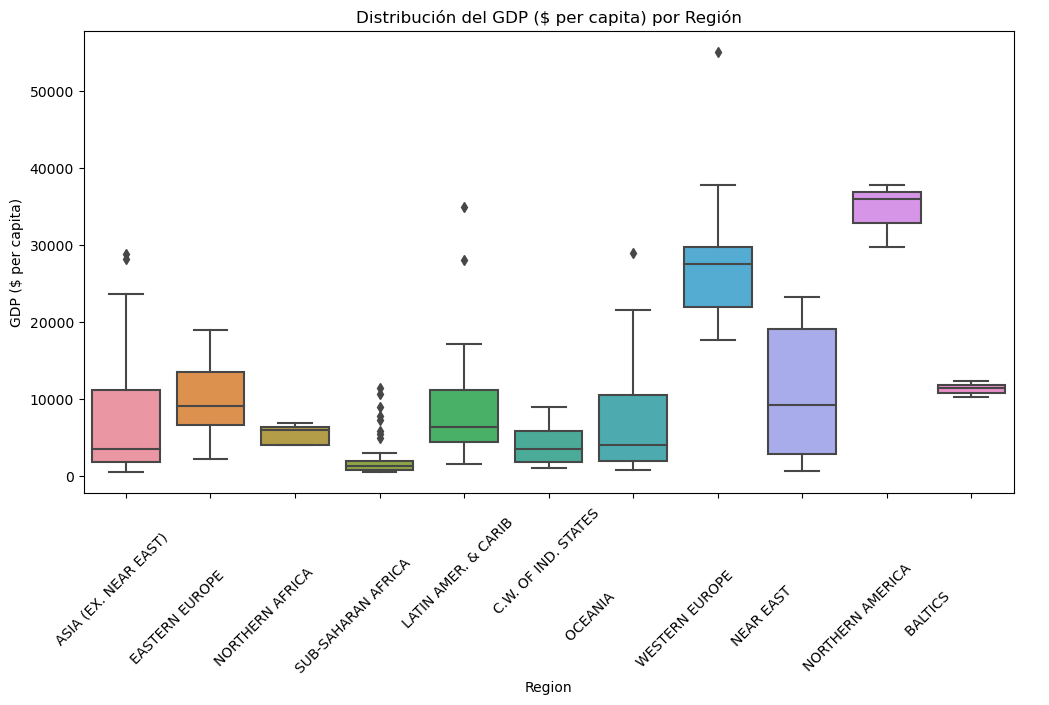

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='GDP ($ per capita)', data=df)
plt.xticks(rotation=45)
plt.title('Distribución del GDP ($ per capita) por Región')
plt.show()





---


En regiones como Asia, Africa Sub-sahariana, America Latina y el Caribe, Oceania y Western Europe, se observa una alta disperción en el rango del GDP per capita, y la presencia de valores que se salen de este rango (fuera de la caja). Estos valores se interpretan como valores atípicos en la región. Estas observaciones son congruentes con la alta desigualdad que estos países presentan, encontrandose estas regiones entre las más desiguales del mundo, siendo America Latina y el Caribe, Asia y Africa Sub-sahariana percibidas como las más desiguales del mundo.

Se observa tambien que regiones como América del Norte, países Baltícos y Europa Occidental tienen en promedio un rango más alto en términos de PIB per cápita respecto al resto de regiones. Esto coincide con que los países bálticos (Estonia, Letonia y Lituania) son considerados economías de altos ingresos por el Banco Mundial, y estando America del Norte entre las economías más desarrolladas, y con el nivel de PIB per capita más alto,

Por otro lado, se observan regiones como África Subsahariana, África del Norte, Estados y territorios de India y América Latina y el Caribe presentan un menor PIB per cápita en relación a las otras regiones. Esta observación es congruente con el hecho de que estas regiones se encuentran entre las que tienen los niveles de PIB per capita más bajos, siendo África Subsahariana la región con el nivel más bajo en el mundo. También es congruente con las pobres condiciones de vida, y las crísis vividas en estas regiones.



---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [17]:
df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($ per capita)"]

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\1432063291.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($ per capita)"]


Population                           -0.035060
Area (sq. mi.)                        0.077193
Pop. Density (per sq. mi.)            0.156407
Coastline (coast/area ratio)          0.032218
Net migration                         0.396881
Infant mortality (per 1000 births)   -0.603968
GDP ($ per capita)                    1.000000
Literacy (%)                          0.510262
Phones (per 1000)                     0.848801
Arable (%)                            0.041983
Crops (%)                            -0.222131
Other (%)                             0.079773
Birthrate                            -0.644514
Deathrate                            -0.210168
Agriculture                          -0.592098
Industry                             -0.028926
Service                               0.550216
Name: GDP ($ per capita), dtype: float64


---


Es importante analizar la correlación entre la variable objetivo y las otras variables del dataframe, pues la correlación nos ayudaría para identificar patrones de comportamiento y tendencias entre las variables, lo cual podría sugerir una potencial relación entre las variables. Al analizar las relaciones entre las variables, podemos entenderlas a mayor cabalidad, y esto es muy valioso en un contexto en donde nos gustaría ser capaces de predecir valores y comportamientos de las variables, para tomar decisiones de políticas públicas.

Del análisis de correlaciones, obtenemos que las variables Phones, Birthrate, Infant mortality, Agriculture, Literacy y Service tienen una correlacion fuerte con GDP (per capita), mientras que las variable Net Migration y Climate muestran una correlación moderada, y las variables Area, Pop. Density, Crops y Deathrate muestran un nivel de correlación debil con GDP ($), según el coeficiente de correlación de Pearson.

Phones, Literacy y Service muestran una correlación fuerte positiva. Esto es congruente con lo que esperabamos del comportamiento de las  variables en la pregunta 1.5. Phones correlacionaría fuertemente con PIB (per capita), pues el acceso a telefonos celulares aumenta con el poder de compra de la población, y este estaría relacionado indirectamente con el PIB (per capita). De manera similar, un mayor PIB (per capita) se relacionaría con un mayor acceso a la educación, por lo que Literacy aumentaría. Además, una población con mayor proporción de lectores es más educada, y competitiva en el mercado laboral, lo que contribuye a aumentar el PIB per capita.
Finalmente, service mostraría una correlación positiva con el PIB (per capita), pues en promedio, las economías con mayor PIB (per capita) están ya más desarrolladas, por lo que pasaron la etapa de la industrialización, y entran en la etapa del desarrollo de servicios (educación, salud, etc).


Por otro lado, Birthrate, Infant Mortality, Agriculture tienen una correlación fuerte negativa con el PIB (per capita). Nuevamente, esto es congruente con lo que esperabamos en la pregunta 1.5. Agriculture tiene una correlación negativa, pues las economías con mayor PIB (per capita) están en promedio más desarrolladas, y muestran en promedio una tendencia a concentrarse más en sectores servicios e industria que agricultura, al ser capaces de generar mayor valor agregado. Respecto a Birthrate, las economías más desarrolladas tienen tendencias a disminuir las tasas de natalidad, al las familias preferir tener menos hijos, e invertir mayor capital (educación, salud, etc) en esos pocos hijos. Finalmente, la mortalidad infantil disminuiría al haber mayor acceso a servicios de la salud.

---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

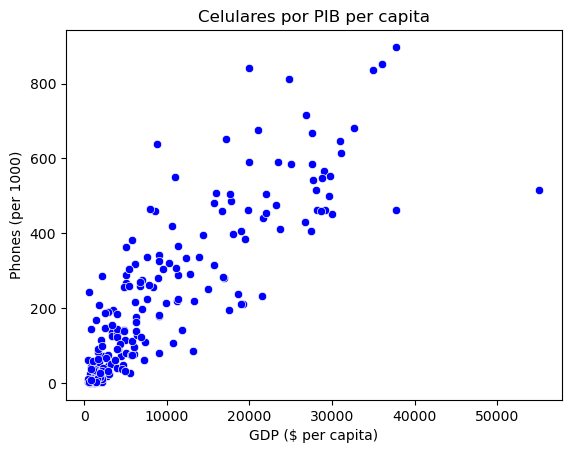

In [18]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', color='blue')
plt.title('Celulares por PIB per capita')
plt.show()

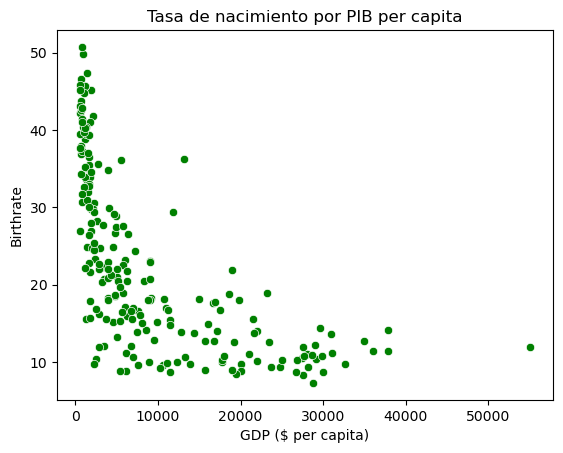

In [19]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Birthrate', color='green')
plt.title('Tasa de nacimiento por PIB per capita')
plt.show()

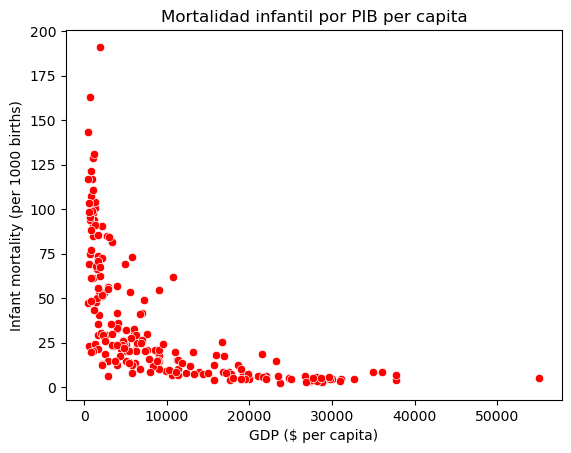

In [20]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Infant mortality (per 1000 births)', color='red')
plt.title('Mortalidad infantil por PIB per capita')
plt.show()

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [21]:
df['GDP ($)']=df['GDP ($ per capita)']*df['Population']

In [22]:
df.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,1.975805e+11
5,2007-01-01,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,...,2.41,0.24,97.35,SUB-SAHARAN AFRICA,45.11,24.20,0.096,0.658,0.246,2.304143e+10
6,2007-01-01,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,...,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,1.159022e+08


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [23]:
df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($)"]

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\1933930968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.dtypes[df.dtypes != "object"].index].corr()["GDP ($)"]


Population                            0.637902
Area (sq. mi.)                        0.556041
Pop. Density (per sq. mi.)           -0.022112
Coastline (coast/area ratio)         -0.055630
Net migration                         0.065793
Infant mortality (per 1000 births)   -0.136514
GDP ($ per capita)                    0.262659
Literacy (%)                          0.109801
Phones (per 1000)                     0.269281
Arable (%)                            0.122425
Crops (%)                            -0.081215
Other (%)                            -0.057372
Birthrate                            -0.177765
Deathrate                            -0.047025
Agriculture                          -0.146252
Industry                              0.043278
Service                               0.094829
GDP ($)                               1.000000
Name: GDP ($), dtype: float64




---
Las variables Población y área tienen una correlacion fuerte con GDP, mientras que la variable Phones, Infant mortality, GDP (per capita), Literacy, Arable, Birthrate y Agriculture muestran un nivel de correlación debil con GDP ($), según el coeficiente de correlación de Pearson.
<Br><Br>En la pregunta 1.10, obtuvimos que Population y Area tuvieron una correlación nula, mientras que ahora muestran una correlación fuerte, y todas las variables que más correlacionaban en la pregunta 1.10, ahora correlacionen en menor medida (correlación debil o nula, en el caso de Service).
<Br><Br>Interpretación: El cambio realizado entre las preguntas 1.10 y la presente pregunta es que ya no observamos las correlaciones con PIB (per capita), sino que ahora lo hacemos con PIB total. Teniendo esto en mente, tiene sentido que las variables Phones, Infant mortality, GDP (per capita), Literacy, Arable, Birthrate y Agriculture muestren un nivel de correlación fuerte con PIB (per capita) pues se relacionan  mucho con el acceso de la población a bienes y servicios. Por eso, al cambiar a la correlación con PIB total, estas variables dejan de correlacionar fuertemente, pues ya no estamos midiendo algo proximo a la capacidad de la población de acceder a bienes y servicios, sino que estamos midiendo algo más proximo al tamaño de una población, y por tanto, al área geografica en la que esta se desarrolla.
---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

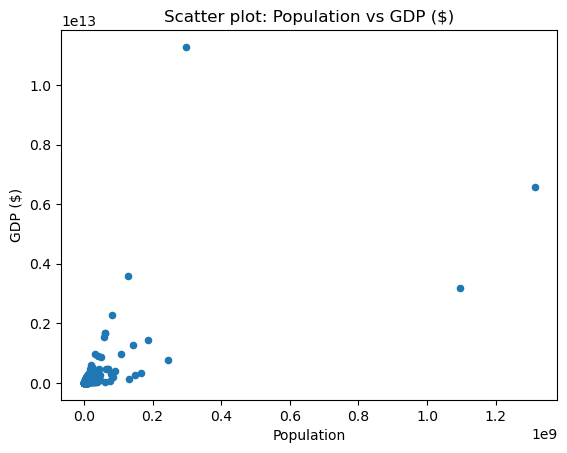

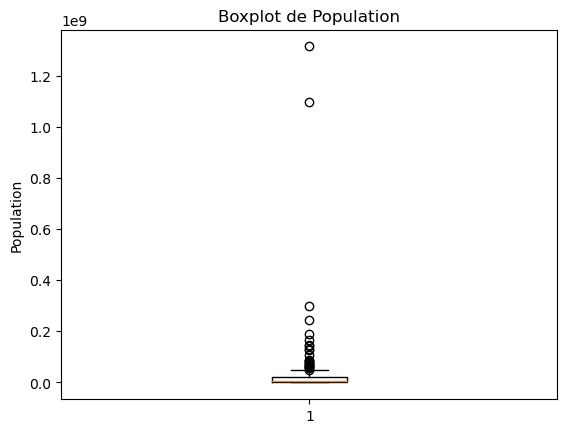

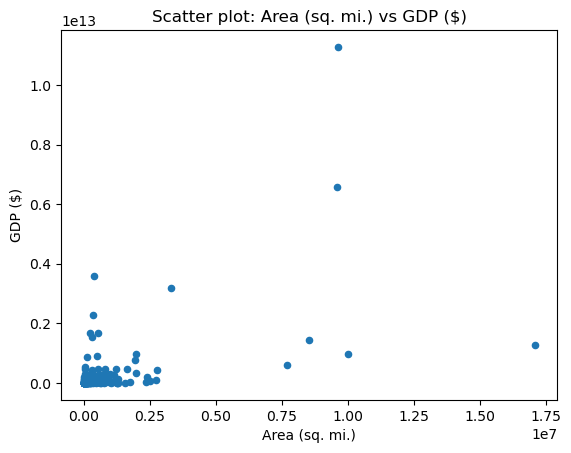

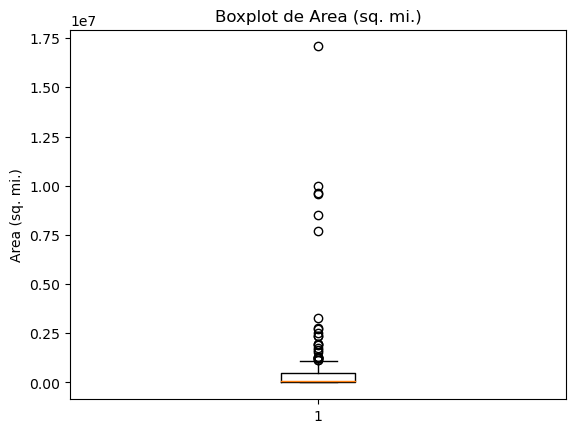

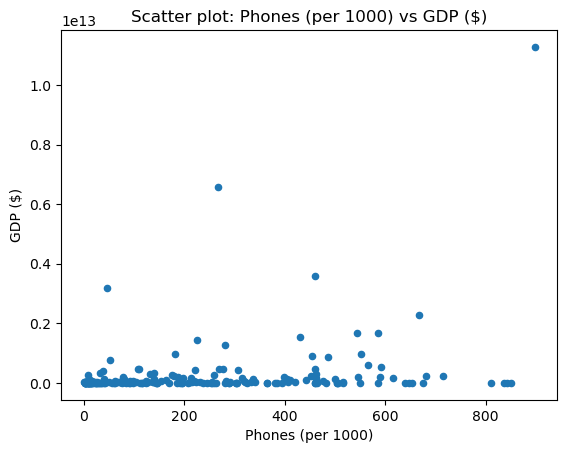

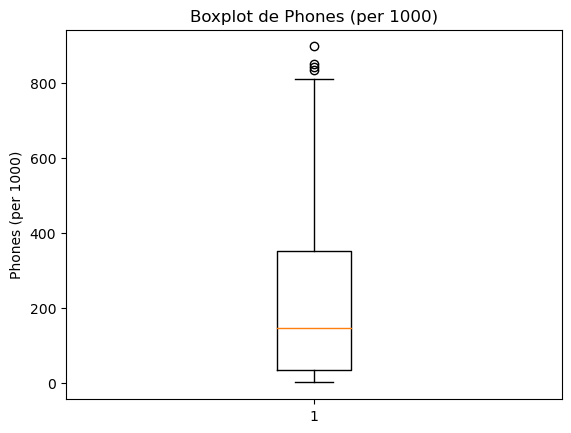

In [24]:
lista = ['Population', 'Area (sq. mi.)', 'Phones (per 1000)']
for var in lista:
    df.plot.scatter(x=var, y="GDP ($)", title=f"Scatter plot: {var} vs GDP ($)")
    plt.show()
    
    plt.boxplot(df[var].dropna())
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.show()

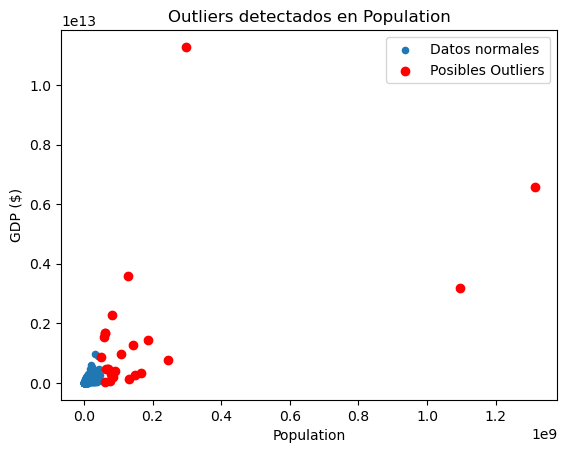

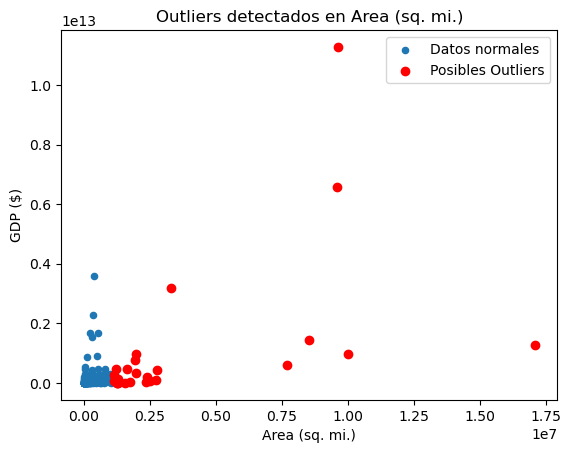

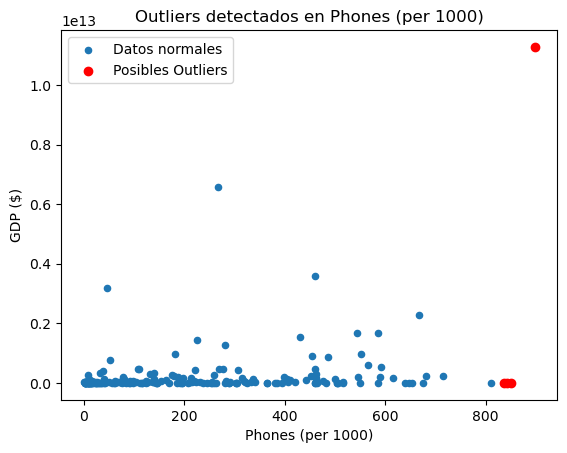

In [25]:
for var in lista:
    # Calcular IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

    # Gráfico
    df.plot.scatter(x=var, y="GDP ($)", label='Datos normales')
    plt.scatter(outliers[var], outliers["GDP ($)"], color='red', label='Posibles Outliers')
    plt.legend()
    plt.title(f"Outliers detectados en {var}")
    plt.show()


---

Tras haber identificado los datos outliers visualmente, procederemos a imputarlos, de manera que podamos analizar las tendencias y la dinamica de las variables adecuadamente

---



In [26]:
df2 = df[df["Population"] < 0.25]
df2 = df[df["Area (sq. mi.)"] < 0.3]
df2 = df[df["Phones (per 1000)"] < 800]

In [28]:
df2.head()

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($)
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,2.173990e+10
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.611745e+10
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,1.975805e+11
5,2007-01-01,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,...,2.41,0.24,97.35,SUB-SAHARAN AFRICA,45.11,24.20,0.096,0.658,0.246,2.304143e+10
6,2007-01-01,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,...,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,1.159022e+08



---

Tras imputar las observaciones identificadas como outliers, quedaríamos con una base de datos practicamente vacía, con 5 observaciones, pues tras filtrar los datos para quitar los outliers, quedamos sin observaciones en el dataframe. Es por esta razón que no vamos a quitar los outliers.

---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

In [29]:
df_num = df.select_dtypes(include=['number'])

corr_pc = df_num.corr()['GDP ($ per capita)'].abs()
corr_gdp = df_num.corr()['GDP ($)'].abs()

variacion1 = ((corr_pc-corr_gdp)/corr_gdp)*100
variacion2 = ((corr_gdp-corr_pc)/corr_pc)*100
df_variacion = pd.DataFrame({
    'Corr GDP per capita': corr_pc,
    'Corr GDP': corr_gdp,
    'Variacion (%)': variacion1,
    'Variacion 2 (%)': variacion2
})

df_variacion = df_variacion.sort_values(by='Variacion (%)', ascending=False)

df_variacion

,Corr GDP per capita,Corr GDP,Variacion (%),Variacion 2 (%)
Pop. Density (per sq. mi.),0.156407,0.022112,607.342302,-85.862573
Net migration,0.396881,0.065793,503.227658,-83.422511
Service,0.550216,0.094829,480.220208,-82.765164
Literacy (%),0.510262,0.109801,364.714783,-78.481425
Deathrate,0.210168,0.047025,346.925854,-77.624924
Infant mortality (per 1000 births),0.603968,0.136514,342.421406,-77.397115
Agriculture,0.592098,0.146252,304.847538,-75.299343
GDP ($ per capita),1.000000,0.262659,280.722040,-73.734118
Birthrate,0.644514,0.177765,262.564032,-72.418665
Phones (per 1000),0.848801,0.269281,215.209635,-68.275081


### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---


La variable que tuvo una mayor diferencia absoluta (en en terminos de variación porcentual) al medir su correlación versus GDP en vez de GDP per capita es Population. En particular, se observa que al medir la correlación entre GDP per capita y el tamaño de la población, esta tiene una magnitud nula, mientras que al medir la correlación entre GDP y el tamaño de la población, el coeficiente tiene un nivel fuerte, según los niveles de Correlación de Pearson.

Esta diferencia se explica por que el PIB per capita, al tener como cuociente el tamaño de la población, busca no correlacionar con el tamaño de esta, para ser una medida de la riqueza que se encuentra distribuida entre la población. Es por eso que GDP per capita no correlaciona con el tamaño de la población, sino que correlaciona más con medidas que guardan relación con la calidad de vida, tales como el acceso a bienes y servicios. En cambio, la variable GDP correlaciona mucho más fuertemente con el tamaño de la población, pues al no tener el tamaño de la población como cuociente, es lógico pensar que un país con mayor tamaño poblacional tendrá un mayor PIB en promedio, al tener una mayor proporción de personas que podrían participar en el mercado laboral.

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [30]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cape Verde": "Cabo Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}



In [31]:
url = 'https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv'
df_gini = pd.read_csv(url)
df_gini

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0
...,...,...,...,...
2106,Zambia,ZMB,2015,55.8
2107,Zambia,ZMB,2022,51.5
2108,Zimbabwe,ZWE,2011,43.2
2109,Zimbabwe,ZWE,2017,44.3


In [32]:
df_gini["Year"] = pd.to_datetime(df_gini["Year"], format="%Y")
df['date']=pd.to_datetime(df['date'], format="%Y")

df["Country"] = df["Country"].str.strip()

df_gini["Country Name"] = df_gini["Country Name"].replace(country_name_mapping)

In [33]:
df_merged = pd.merge(df, df_gini, left_on=["Country", "date"], right_on=["Country Name", "Year"], how="inner")
df_merged.drop(columns=['Year','Country Name'], inplace=True)
df_merged

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Country Code,Value
0,2007-01-01,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,...,87.21,3.0,16.73,7.55,0.095,0.358,0.547,4.471245e+11,ARG,46.3
1,2007-01-01,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,80.15,4.0,12.07,8.23,0.239,0.343,0.418,1.041730e+10,ARM,31.2
2,2007-01-01,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,82.23,3.0,8.74,9.76,0.018,0.304,0.678,2.457864e+11,AUT,30.6
3,2007-01-01,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,69.85,4.0,11.16,14.02,0.093,0.316,0.591,6.278737e+10,BLR,29.6
4,2007-01-01,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,76.32,3.0,10.38,10.27,0.010,0.240,0.749,3.020308e+11,BEL,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2007-01-01,Thailand,ASIA (EX. NEAR EAST),64631595,514000,125.7,0.63,0.00,20.48,7400.0,...,64.18,2.0,13.87,7.04,0.099,0.441,0.460,4.782738e+11,THA,39.8
63,2007-01-01,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,...,42.18,3.0,8.82,14.39,0.187,0.452,0.361,2.522384e+11,UKR,27.0
64,2007-01-01,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,...,76.33,3.0,10.71,10.13,0.005,0.237,0.758,1.678874e+12,GBR,34.4
65,2007-01-01,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,...,80.65,3.0,14.14,8.26,0.010,0.204,0.787,1.128119e+13,USA,40.8


### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.





In [34]:
df_merged[df_merged.dtypes[df_merged.dtypes != "object"].index].corr()["Value"].sort_values(ascending=False)

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\577407845.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged[df_merged.dtypes[df_merged.dtypes != "object"].index].corr()["Value"].sort_values(ascending=False)


Value                                 1.000000
Birthrate                             0.377369
Other (%)                             0.281669
Area (sq. mi.)                        0.206807
Infant mortality (per 1000 births)    0.203505
Agriculture                           0.177731
Crops (%)                             0.133987
Population                            0.097588
GDP ($)                               0.046118
Industry                             -0.032563
Pop. Density (per sq. mi.)           -0.071111
Service                              -0.163238
Coastline (coast/area ratio)         -0.170565
Literacy (%)                         -0.181855
Deathrate                            -0.324386
Arable (%)                           -0.342382
Net migration                        -0.345544
Phones (per 1000)                    -0.394264
GDP ($ per capita)                   -0.398683
Name: Value, dtype: float64

In [35]:
df_merged[df_merged.dtypes[df_merged.dtypes != "object"].index].corr()["Value"].abs().sort_values(ascending=False)

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\4038300477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged[df_merged.dtypes[df_merged.dtypes != "object"].index].corr()["Value"].abs().sort_values(ascending=False)


Value                                 1.000000
GDP ($ per capita)                    0.398683
Phones (per 1000)                     0.394264
Birthrate                             0.377369
Net migration                         0.345544
Arable (%)                            0.342382
Deathrate                             0.324386
Other (%)                             0.281669
Area (sq. mi.)                        0.206807
Infant mortality (per 1000 births)    0.203505
Literacy (%)                          0.181855
Agriculture                           0.177731
Coastline (coast/area ratio)          0.170565
Service                               0.163238
Crops (%)                             0.133987
Population                            0.097588
Pop. Density (per sq. mi.)            0.071111
GDP ($)                               0.046118
Industry                              0.032563
Name: Value, dtype: float64



---

*Climate*:  sorprendentemente muestra ser la que tiene mayor correlación (y negativa) con el indice Gini. Aun así, dada la caracterización de Climate como una variable categorica que toma valores enteros para caracterizar al país, la correlación dificilmente puede ser interpretada.

La segunda variable con mayor correlación es *Phones* y toma un valor negativo. Vale decir, una disminución en el indice Gini induce a que más personas tengan un celular. Lo consideramos esperable, con menor Gini, los "más ricos" se parecen más a los "más pobres", por lo que es más probable que ambos grupos posean un celular (esto sin distinguir calidad de celular).

La siguiente variable es *GDP per capita*, donde el aumento en dicho indice disminuye el Gini. A pesar de que esperabamos un valor alto, estabamos indecisos sobre sí sería positivo o negativo, dado a que el PIB per capita no considera la distribución del ingreso.

Contrario al caso anterior, sorprendentemente *GDP ($)* y *Industry* muestran una correlación muy cercana a cero. Esperabamos que, a mayor producción, las personas percibirían mayores niveles de ingreso, lo que podría reducir el Gini. Respecto al PIB, posiblemente esto explicaría la necesidad de ajustar por la Población.

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [36]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}


In [37]:
url = 'https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv'
df_co2 = pd.read_csv(url)
df_co2['Year']=pd.to_datetime(df_co2['Year'], format="%Y")
df_co2["Country"] = df_co2["Country"].str.title()
df_co2["Country"] = df_co2["Country"].map(country_name_mapping_co2).fillna(df_co2["Country"])

df_co2 = df_co2.groupby(["Country", "Year"], as_index=False).agg(lambda x: np.nan if x.isna().all() else x.sum())

df_co2.isnull().sum()

Country                            0
Year                               0
Total                              0
Solid Fuel                      5690
Liquid Fuel                      618
Gas Fuel                        8157
Cement                           517
Gas Flaring                    16045
Per Capita                      5476
Bunker fuels (Not in Total)      289
dtype: int64

In [38]:
df_co2.dtypes

Country                                object
Year                           datetime64[ns]
Total                                   int64
Solid Fuel                            float64
Liquid Fuel                           float64
Gas Fuel                              float64
Cement                                float64
Gas Flaring                           float64
Per Capita                            float64
Bunker fuels (Not in Total)           float64
dtype: object

In [39]:
df_co2

,Country,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,Afghanistan,1949-01-01,4,4.0,0.0,0.0,0.0,NaN,NaN,0.0
1,Afghanistan,1950-01-01,23,6.0,18.0,0.0,0.0,NaN,0.003143,0.0
2,Afghanistan,1951-01-01,25,7.0,18.0,0.0,0.0,NaN,0.003299,0.0
3,Afghanistan,1952-01-01,25,9.0,17.0,0.0,0.0,NaN,0.003338,0.0
4,Afghanistan,1953-01-01,29,10.0,18.0,0.0,0.0,NaN,0.003701,0.0
...,...,...,...,...,...,...,...,...,...,...
18716,Zimbabwe,2016-01-01,2876,1892.0,857.0,NaN,127.0,NaN,0.201038,33.0
18717,Zimbabwe,2017-01-01,2538,1529.0,881.0,NaN,129.0,NaN,0.173834,42.0
18718,Zimbabwe,2018-01-01,2923,1664.0,1108.0,NaN,151.0,NaN,0.196194,51.0
18719,Zimbabwe,2019-01-01,2693,1520.0,1018.0,NaN,154.0,NaN,0.177098,44.0




---

Notamos que no hay datos faltantes para Year, Country y Total. Respecto al resto variables que sí poseen missings, debemos tener cuidado sobre cual es el motivo por el que existen. En especifico, un missing podría ser informativo sobre el uso de un tipo de combustible aun no existia o no era utilizado. Por ello, sería interesante saber sí los missings existen para un rango especifico de fechas, en un rango donde aun eran utilizados.

Por otra parte, también los missings pueden ser explicados por el país. Vale decir, que por ciertas caracteristicas e historia del país (como lo puede ser su fecha de fundación), se generen dichos missings. Nuevamente, hablamos que el missing no es una falta de información, sino que en sí posee información valiosa.

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


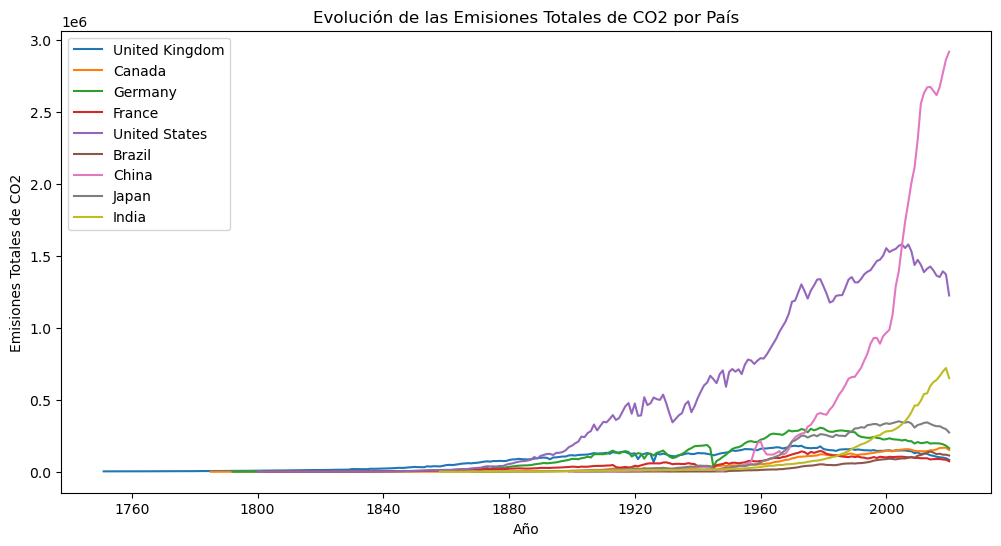

In [40]:
paises = ['United Kingdom', 'Canada', 'Germany', 'France', 'United States', 'Brazil', 'China', 'Japan', 'India']

df_co2_filtrado = df_co2[df_co2["Country"].isin(paises)]

plt.figure(figsize=(12, 6))

for pais in paises:
    datos_pais = df_co2_filtrado[df_co2_filtrado["Country"] == pais]
    plt.plot(datos_pais["Year"], datos_pais["Total"], label=pais)

plt.xlabel("Año")
plt.ylabel("Emisiones Totales de CO2")
plt.title("Evolución de las Emisiones Totales de CO2 por País")
plt.legend()

plt.show()

### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?


In [41]:
datos = df_co2[df_co2["Year"] == "2007-01-01"]

fuentes = ["Solid Fuel", "Liquid Fuel", "Gas Fuel", "Cement", "Gas Flaring"]

rankings={}

for pais in datos['Country'].unique():
  datos_pais = datos[datos["Country"] == pais][fuentes].dropna(axis=1)
  ranking = datos_pais.T
  ranking.columns = ['Emisiones']
  ranking = ranking.sort_values(by='Emisiones', ascending=False).reset_index()
  ranking['Ranking'] = range(1, len(ranking) + 1)
  rankings[pais] = ranking.set_index('index')['Ranking'].to_dict()

df_rankings = pd.DataFrame.from_dict(rankings, orient='index').reset_index()

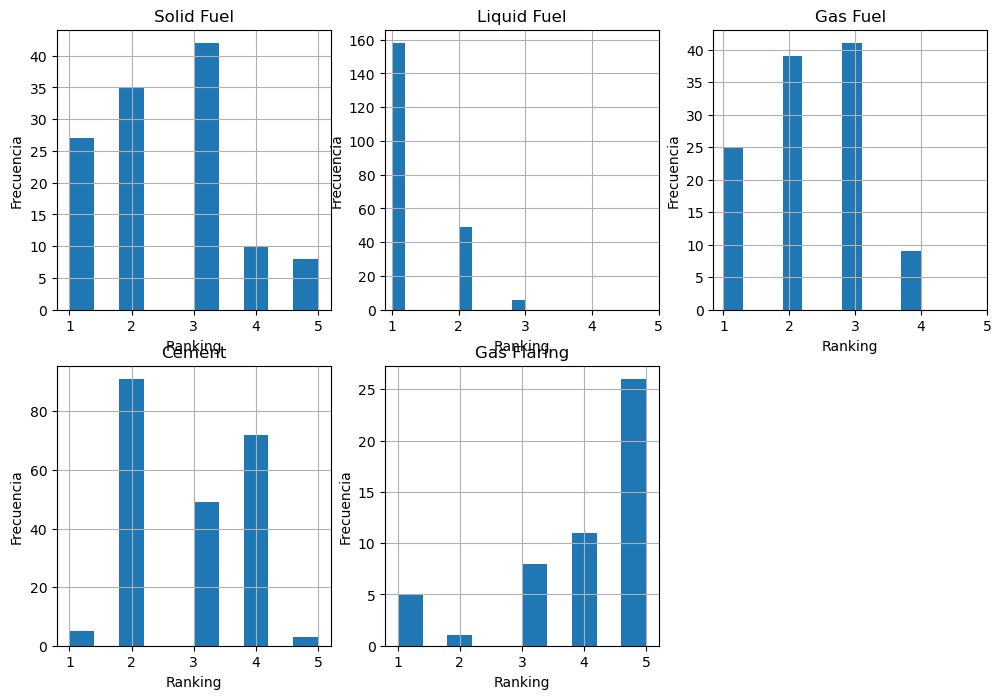

In [42]:
plt.figure(figsize=(12, 8))

for i, fuente in enumerate(fuentes):
    if fuente in df_rankings.columns:
        plt.subplot(2, 3, i + 1)
        df_rankings[fuente].dropna().hist()
        plt.xticks([1, 2, 3, 4, 5])
        plt.xlabel("Ranking")
        plt.ylabel("Frecuencia")
        plt.title(fuente)

plt.show()



---


La fuente más contaminante en la mayoria de paises corresponde a *Liquid Fuel* (combustible liquido). Esto se podría explicar en que el combustible liquido es utilizado para los motores, por lo que es un material que buena parte de la población y empresas utiliza para el transporte (ya sea terrestre, maritima o aerea). También tiene otros usos como la generación de electricidad.

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?


In [43]:
df_co2 = df_co2.sort_values(by=["Country", "Year"])

df_co2["CO2 Change (%)"] = df_co2.groupby("Country")["Total"].pct_change() * 100
df_co2.isnull().sum()

Country                            0
Year                               0
Total                              0
Solid Fuel                      5690
Liquid Fuel                      618
Gas Fuel                        8157
Cement                           517
Gas Flaring                    16045
Per Capita                      5476
Bunker fuels (Not in Total)      289
CO2 Change (%)                   653
dtype: int64

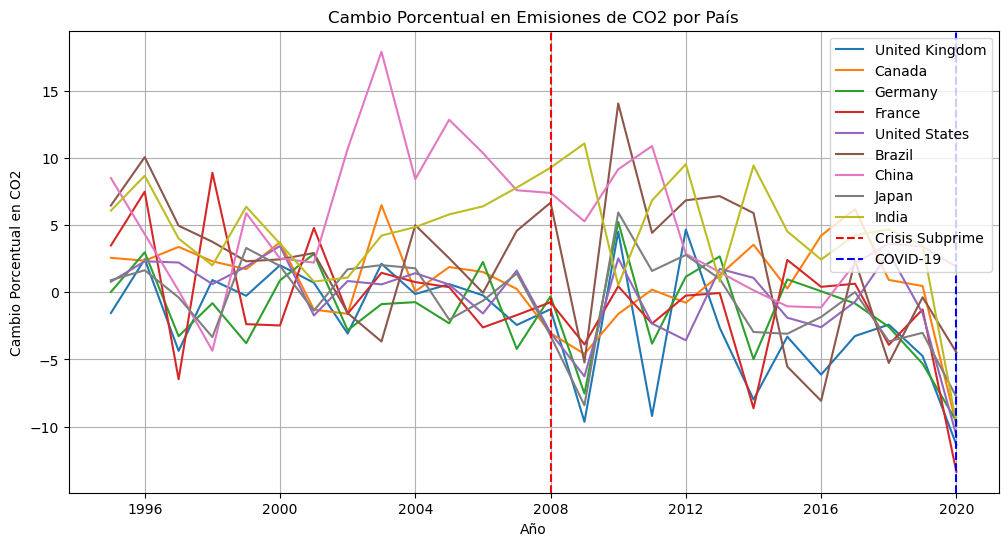

In [44]:
df_co2_filtered = df_co2[df_co2["Year"] >= "1995"]

df_co2_filtrado = df_co2_filtered[df_co2_filtered["Country"].isin(paises)]

plt.figure(figsize=(12, 6))

for pais in paises:
    datos_pais = df_co2_filtrado[df_co2_filtrado["Country"] == pais]
    plt.plot(datos_pais["Year"], datos_pais["CO2 Change (%)"], label=pais)

plt.axvline(x=pd.Timestamp("2008"), color="red", linestyle="--", label="Crisis Subprime")
plt.axvline(x=pd.Timestamp("2020"), color="blue", linestyle="--", label="COVID-19")
plt.xlabel("Año")
plt.ylabel("Cambio Porcentual en CO2")
plt.title("Cambio Porcentual en Emisiones de CO2 por País")
plt.legend()
plt.grid(True)

plt.show()


---


No consideramos necesaria una imputación. La pregunta solicita unicamente el cambio percentual para la variable Total que, como hemos analizado anteriormente, no posee missings, y por consecuencia, tampoco las tendra el cambio porcentual (los datos faltantes que encontramos al calcular solo corresponden a la primera fecha registrada por país, dado a que no tienen referencia, pero no tienen efecto para el analisis que buscamos obtener).

Observamos una caida en las emisiones de CO2 ante sucesos de crisis (tanto en la crisis subprime como la pandemia de Covid-19, considerar que esta ultima se manifestó en diciembre de 2019). La interpretación económica es que las crisis induce, por un lado, una menor producción y movimiento de capitales, y con ello, las empresas y las personas emitiran menores niveles de gases. Por otro lado, en crisis las personas tendrán menores ingresos, limitando el uso de fuentes contaminantes como lo es el combustible liquido (que encontramos que era la fuente más contaminante para 2007), siendo especialmente más relevante para la crisis del covid 19, donde el movimiento y viaje fueron fuertemente restringidas tanto a nivel legal como por los menores ingresos.



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_i = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\3484237896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007_2010["Mean CO2 Change (%)"] = df_2007_2010.groupby("Country")["CO2 Change (%)"].transform("mean")
C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\3484237896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007_2010["CO2 Deviation"] = df_2007_2010["CO2 Change (%)"] - df_2007_2010["Mean CO2 Change (%)"]
C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\3484237896.py:13: SettingWit

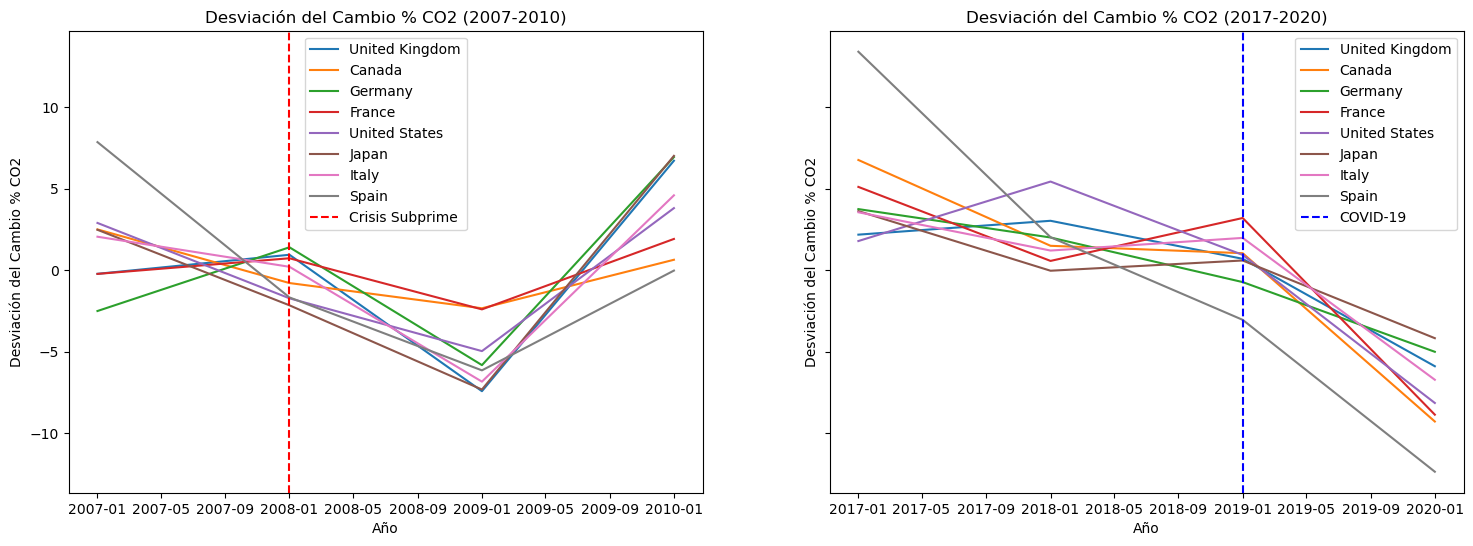

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

paises = ["United Kingdom", "Canada", "Germany", "France", "United States",
          "Japan", "Italy", "Spain"]


df_2007_2010 = df_co2[(df_co2["Year"] >= "2007") & (df_co2["Year"] <= "2010") & (df_co2["Country"].isin(paises))]
df_2007_2010["Mean CO2 Change (%)"] = df_2007_2010.groupby("Country")["CO2 Change (%)"].transform("mean")
df_2007_2010["CO2 Deviation"] = df_2007_2010["CO2 Change (%)"] - df_2007_2010["Mean CO2 Change (%)"]

df_2017_2020 = df_co2[(df_co2["Year"] >= "2017") & (df_co2["Year"] <= "2020") & (df_co2["Country"].isin(paises))]
df_2017_2020["Mean CO2 Change (%)"] = df_2017_2020.groupby("Country")["CO2 Change (%)"].transform("mean")
df_2017_2020["CO2 Deviation"] = df_2017_2020["CO2 Change (%)"] - df_2017_2020["Mean CO2 Change (%)"]


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Gráfico 2007-2010
for pais in paises:
    datos_pais = df_2007_2010[df_2007_2010["Country"] == pais]
    axes[0].plot(datos_pais["Year"], datos_pais["CO2 Deviation"], label=pais)

axes[0].set_title("Desviación del Cambio % CO2 (2007-2010)")
axes[0].axvline(x=pd.Timestamp("2008"), color="red", linestyle="--", label="Crisis Subprime")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Desviación del Cambio % CO2")
axes[0].legend()


# Gráfico 2017-2020
for pais in paises:
    datos_pais = df_2017_2020[df_2017_2020["Country"] == pais]
    axes[1].plot(datos_pais["Year"], datos_pais["CO2 Deviation"], label=pais)

axes[1].set_title("Desviación del Cambio % CO2 (2017-2020)")
axes[1].axvline(x=pd.Timestamp("2019"), color="blue", linestyle="--", label="COVID-19")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Desviación del Cambio % CO2")
axes[1].legend()

# Mostrar gráfico
plt.show()


---


Crisis Subprime: Al observar las desviaciones del cambio porcentual del CO2, notamos que Reino Unido inició con una tendencia creciente en sus niveles de CO2, sin embargo cuando inicia la crisis subprime su tendencia se vuelve muy negativa hasta llegar a ser el país con mayor desviación en la emisión de CO2 (comparado con Japón, pero su tendencía ya era negativa desde antes que iniciara la crisis, por lo que no tiene una desviación atipica).

Covid 19: Reino Unido, a diferencia del caso de la crisis subprime, muestra un comportamiento similar al de los países de la muestra, es decir, con una tendencia negativa. Lo unico a destacar, es que su tendencia no cambia tanto a comparación de países como Cánada o Estados Unidos.



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


In [46]:
df_final = pd.merge(df_co2, df_merged, left_on=["Country", "Year"], right_on=["Country", "date"], how="inner")

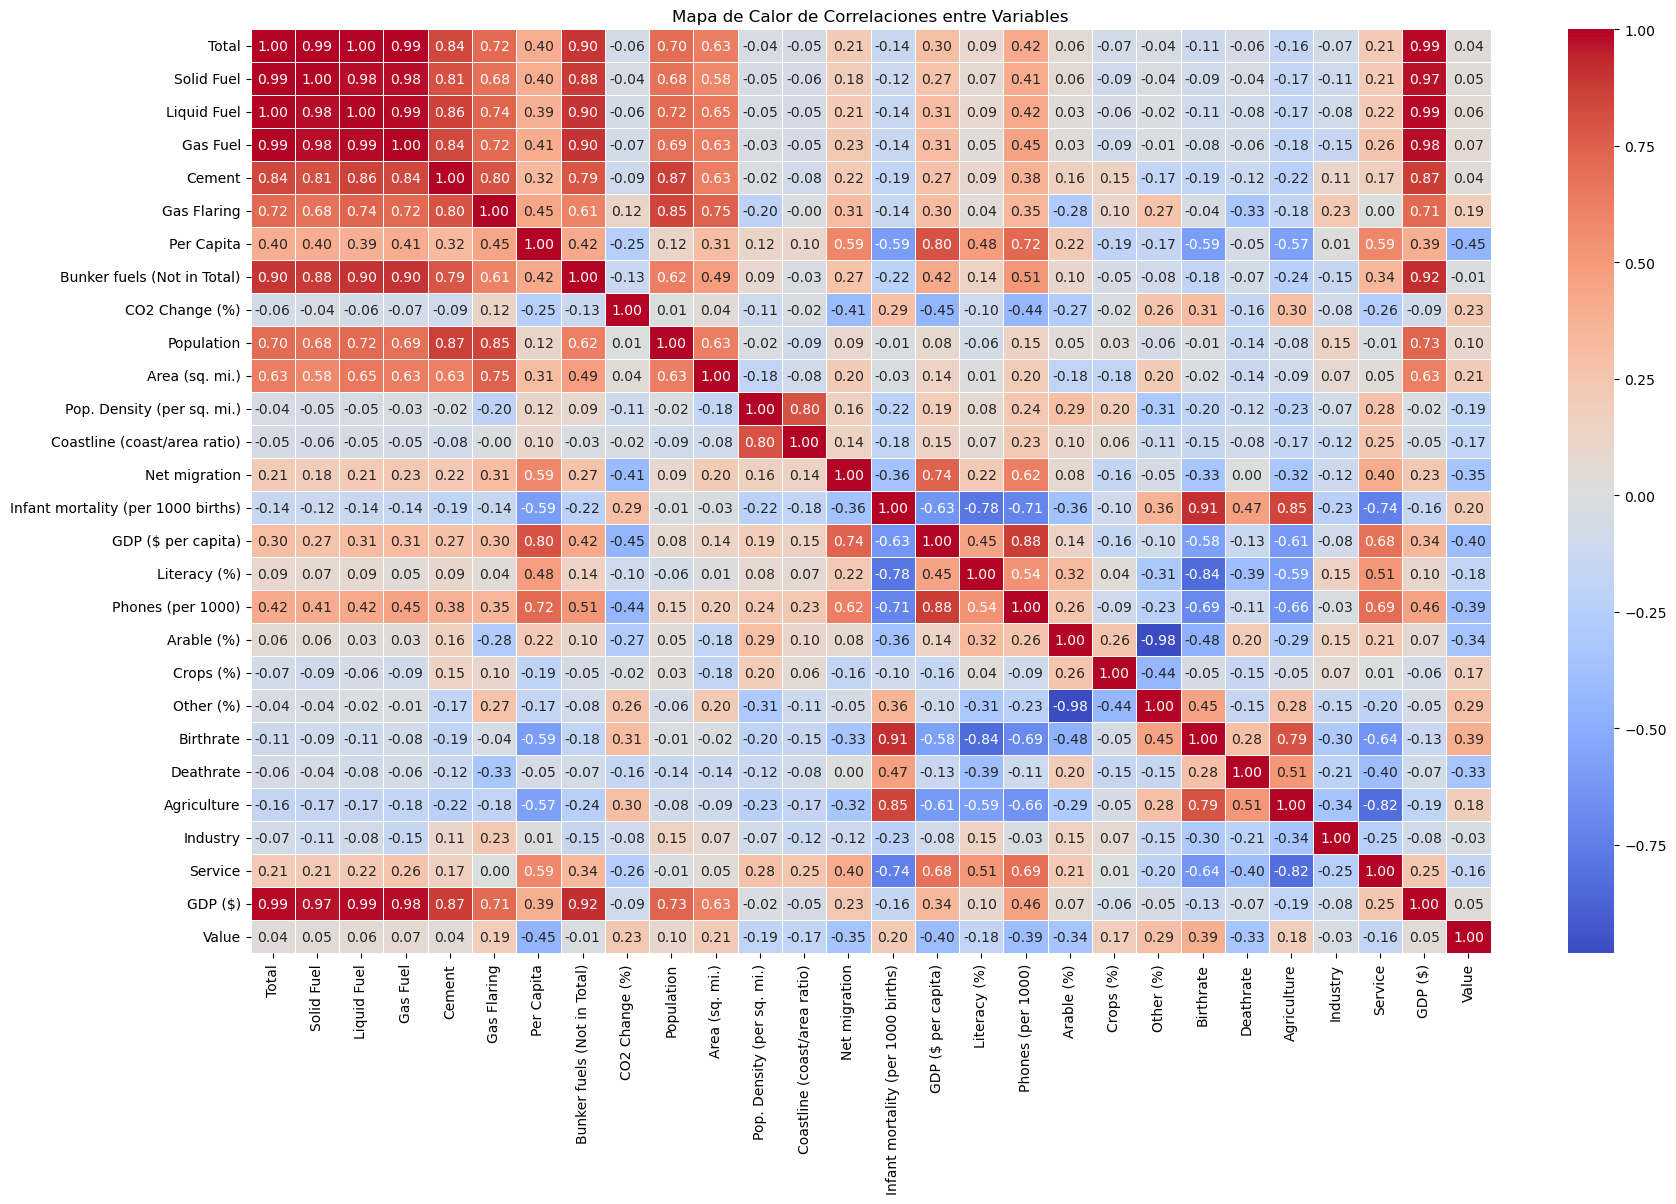

In [47]:
df_final = pd.merge(df_co2, df_merged, left_on=["Country", "Year"], right_on=["Country", "date"], how="inner")


corr_matrix = df_final.select_dtypes(include=["number"]).corr()

# Graficar heatmap de correlaciones
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()

In [48]:
df_final[df_final.dtypes[df_final.dtypes != "object"].index].corr()["Total"].sort_values(ascending=False)

C:\Users\TOMAS\AppData\Local\Temp\ipykernel_19416\1572556291.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final[df_final.dtypes[df_final.dtypes != "object"].index].corr()["Total"].sort_values(ascending=False)


Total                                 1.000000
Liquid Fuel                           0.996462
Solid Fuel                            0.993344
Gas Fuel                              0.992292
GDP ($)                               0.988298
Bunker fuels (Not in Total)           0.898283
Cement                                0.844268
Gas Flaring                           0.717287
Population                            0.704523
Area (sq. mi.)                        0.629783
Phones (per 1000)                     0.416926
Per Capita                            0.401027
GDP ($ per capita)                    0.301822
Service                               0.212429
Net migration                         0.205292
Literacy (%)                          0.090780
Arable (%)                            0.062190
Value                                 0.037199
Pop. Density (per sq. mi.)           -0.040175
Other (%)                            -0.043756
Coastline (coast/area ratio)         -0.049598
Deathrate    

---


Tomando como variable objetivo *Total* y sin considerar las variables de emisión, encontramos que las variables con mayor correlación son:

*   *GDP* (económica): economías más grandes emiten mayores niveles de CO2 dado a su mayor uso de energía (industrias, transporte, generación electrica), la industrializacion y urbanización. Esto genera la necesidad de usar fuentes contaminantes como lo pueden ser los combustibles fosiles

*   *Población* y *Área* (demográfica): Primeramente, hay que tener en cuenta que ambas variables ya vienen correlacionadas (Áreas más grandes permiten tener poblaciones más grandes), el analisis se aplicará especificamente a la Población, pero tomando en cuenta esta relación Población - Área. Una población más grande implica en una mayor demanda de bienes, servicios y energía, lo que exige un mayor uso de residuos y consumo de recursos naturales, generando emisiones de gases contaminantes

* *Phones (per 1000)* (desarrollo humano): Su relación con el desarrollo humano es indirecta. Sociedades con mayor acceso a tecnologías (como celulares) poseen un mayor consumo energetico por persona, lo que provocaría la necesidad de utilizar fuentes contaminantes. Además, una población con mayor cantidad de celulares podría indicar mayores ingresos y consumo y, volviendo a la respuesta de *Población*, exigiendo un mayor uso de residuos y consumo de recursos naturales.



---
